In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('Food_Delivery_Times.csv')

In [8]:
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [9]:
df.isnull().sum()

,0
Order_ID,0
Distance_km,0
Weather,30
Traffic_Level,30
Time_of_Day,30
Vehicle_Type,0
Preparation_Time_min,0
Courier_Experience_yrs,30
Delivery_Time_min,0


In [10]:
# Fill missing values in categorical columns with their mode
for col in ['Weather', 'Traffic_Level', 'Time_of_Day']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Fill missing values in 'Courier_Experience_yrs' with the median
df['Courier_Experience_yrs'].fillna(df['Courier_Experience_yrs'].median(), inplace=True)

# Drop the 'Order_ID' column
df.drop('Order_ID', axis=1, inplace=True)

# Verify that missing values have been handled
df.isnull().sum()

,0
Distance_km,0
Weather,0
Traffic_Level,0
Time_of_Day,0
Vehicle_Type,0
Preparation_Time_min,0
Courier_Experience_yrs,0
Delivery_Time_min,0


In [11]:
df.columns

Index(['Distance_km', 'Weather', 'Traffic_Level', 'Time_of_Day',
       'Vehicle_Type', 'Preparation_Time_min', 'Courier_Experience_yrs',
       'Delivery_Time_min'],
      dtype='object')

In [12]:
df.head()

,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,19.03,Clear,Low,Morning,Bike,16,5.0,68


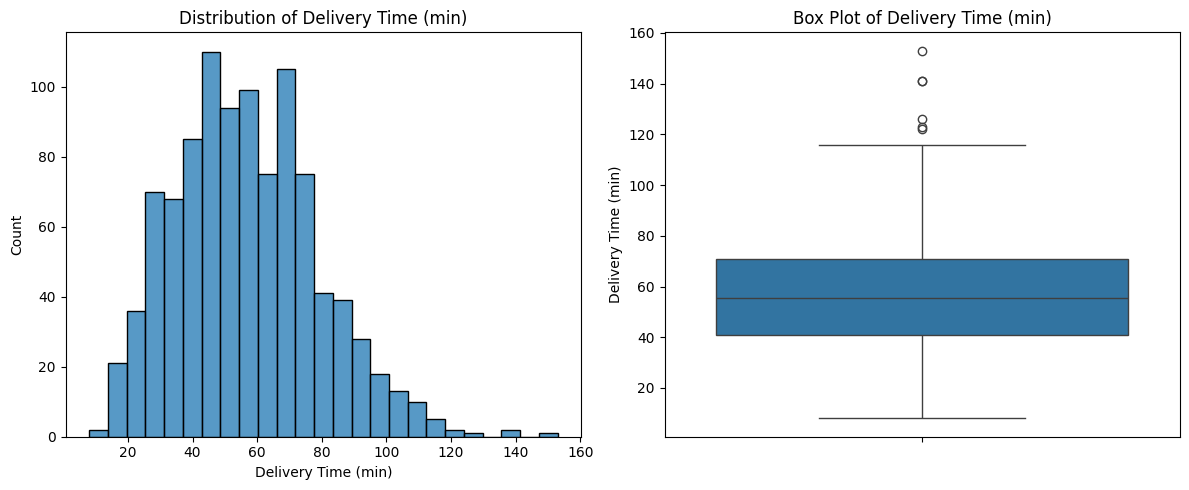

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram
sns.histplot(df['Delivery_Time_min'], ax=axes[0])
axes[0].set_title('Distribution of Delivery Time (min)')
axes[0].set_xlabel('Delivery Time (min)')

# Box Plot
sns.boxplot(y=df['Delivery_Time_min'], ax=axes[1])
axes[1].set_title('Box Plot of Delivery Time (min)')
axes[1].set_ylabel('Delivery Time (min)')

plt.tight_layout()
plt.show()

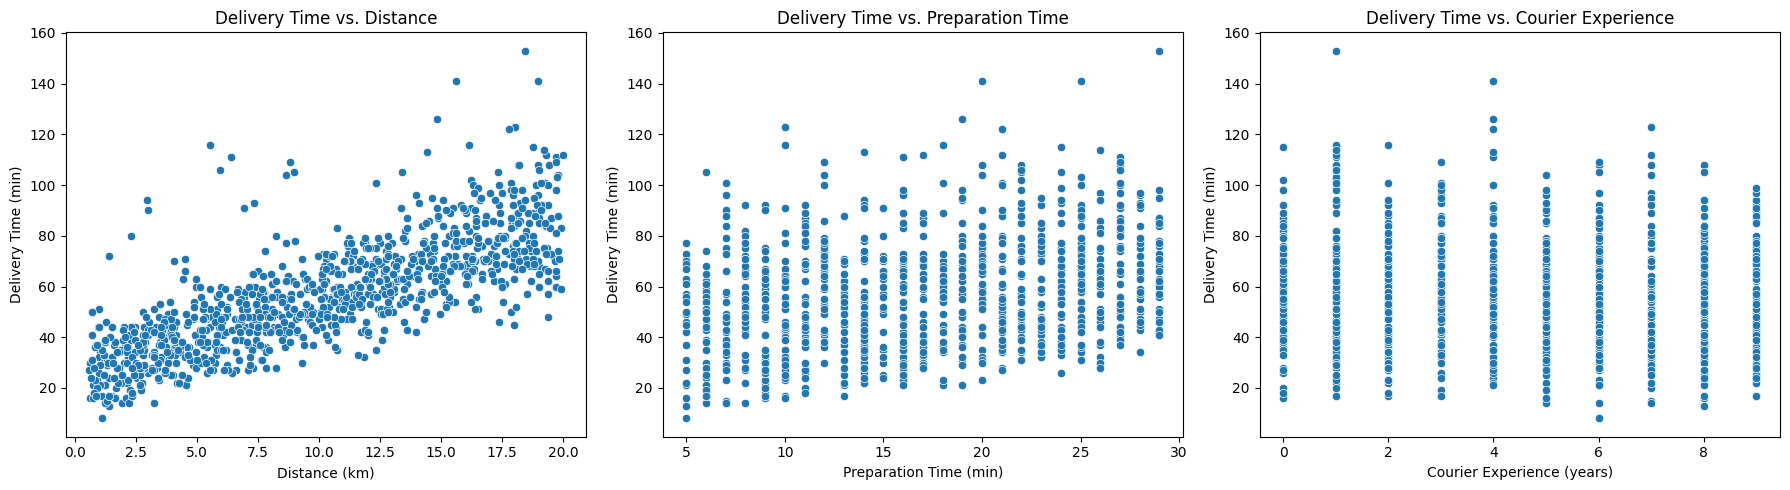

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Scatter plot for Distance_km vs. Delivery_Time_min
sns.scatterplot(x='Distance_km', y='Delivery_Time_min', data=df, ax=axes[0])
axes[0].set_title('Delivery Time vs. Distance')
axes[0].set_xlabel('Distance (km)')
axes[0].set_ylabel('Delivery Time (min)')

# Scatter plot for Preparation_Time_min vs. Delivery_Time_min
sns.scatterplot(x='Preparation_Time_min', y='Delivery_Time_min', data=df, ax=axes[1])
axes[1].set_title('Delivery Time vs. Preparation Time')
axes[1].set_xlabel('Preparation Time (min)')
axes[1].set_ylabel('Delivery Time (min)')

# Scatter plot for Courier_Experience_yrs vs. Delivery_Time_min
sns.scatterplot(x='Courier_Experience_yrs', y='Delivery_Time_min', data=df, ax=axes[2])
axes[2].set_title('Delivery Time vs. Courier Experience')
axes[2].set_xlabel('Courier Experience (years)')
axes[2].set_ylabel('Delivery Time (min)')

plt.tight_layout()
plt.show()

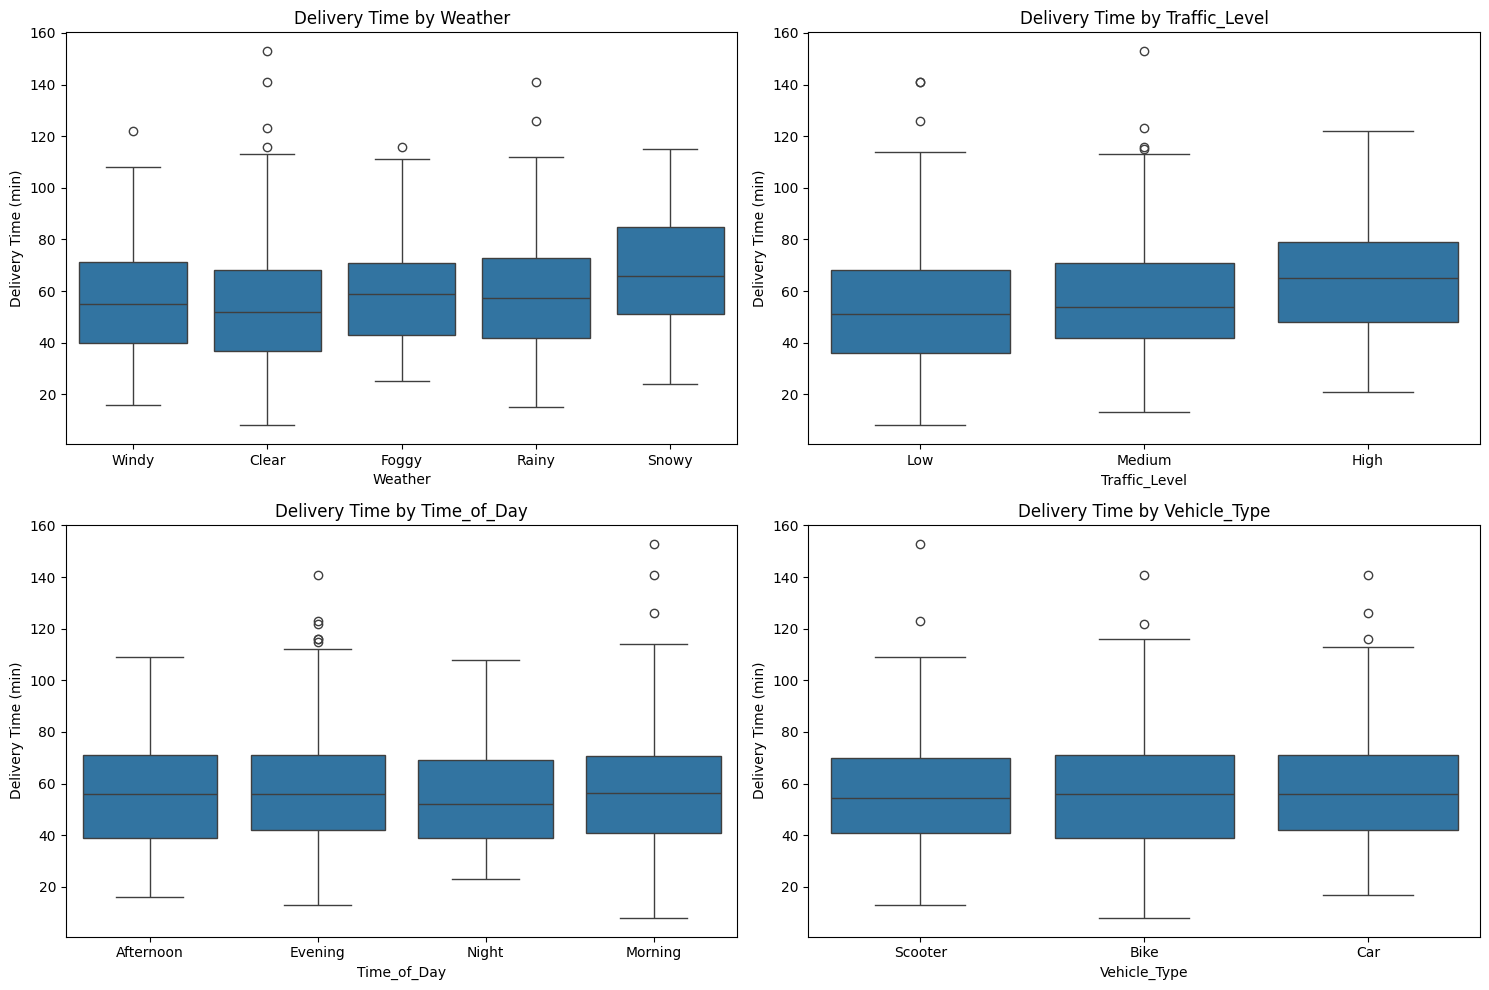

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten() # Flatten the 2x2 array of axes for easy iteration

categorical_features = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']

for i, feature in enumerate(categorical_features):
    sns.boxplot(x=feature, y='Delivery_Time_min', data=df, ax=axes[i])
    axes[i].set_title(f'Delivery Time by {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Delivery Time (min)')

plt.tight_layout()
plt.show()

In [16]:
numerical_df = df.select_dtypes(include=[np.number])
print("Numerical features selected.")


Numerical features selected.


In [17]:
correlation_matrix = numerical_df.corr()
print("Correlation matrix computed.")

Correlation matrix computed.


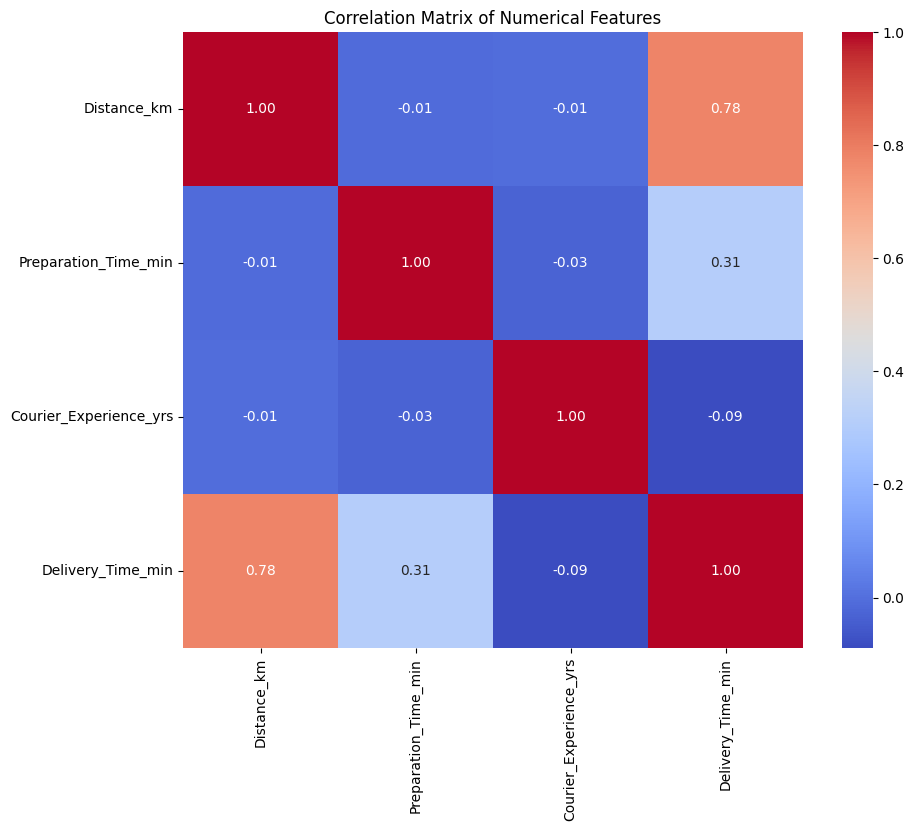

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [19]:
from scipy.stats import pearsonr
print("pearsonr function imported.")

pearsonr function imported.


In [20]:
numerical_features_for_correlation = ['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs']

print("Pearson Correlation Coefficients and p-values with Delivery_Time_min:")
for feature in numerical_features_for_correlation:
    correlation, p_value = pearsonr(df[feature], df['Delivery_Time_min'])
    print(f"  {feature}: Correlation = {correlation:.4f}, p-value = {p_value:.4f}")

Pearson Correlation Coefficients and p-values with Delivery_Time_min:
  Distance_km: Correlation = 0.7810, p-value = 0.0000
  Preparation_Time_min: Correlation = 0.3073, p-value = 0.0000
  Courier_Experience_yrs: Correlation = -0.0891, p-value = 0.0048


In [21]:
from scipy.stats import f_oneway
print("f_oneway function imported for ANOVA.")

f_oneway function imported for ANOVA.


In [22]:
categorical_features_for_anova = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']

print("ANOVA Test Results for Categorical Features with Delivery_Time_min:")
for feature in categorical_features_for_anova:
    groups = [df['Delivery_Time_min'][df[feature] == category] for category in df[feature].unique()]
    f_statistic, p_value = f_oneway(*groups)
    print(f"  {feature}: F-statistic = {f_statistic:.4f}, p-value = {p_value:.4f}")

ANOVA Test Results for Categorical Features with Delivery_Time_min:
  Weather: F-statistic = 10.4991, p-value = 0.0000
  Traffic_Level: F-statistic = 19.7513, p-value = 0.0000
  Time_of_Day: F-statistic = 0.3468, p-value = 0.7915
  Vehicle_Type: F-statistic = 0.5894, p-value = 0.5549


In [23]:
categorical_features_for_encoding = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']
print(f"Categorical features identified for encoding: {categorical_features_for_encoding}")

Categorical features identified for encoding: ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']


In [24]:
X = df.drop('Delivery_Time_min', axis=1)
y = df['Delivery_Time_min']

print("X and y DataFrames created.")

X and y DataFrames created.


In [25]:
from sklearn.preprocessing import LabelEncoder
print("LabelEncoder imported.")

LabelEncoder imported.


In [26]:
label_encoder = LabelEncoder()
for feature in categorical_features_for_encoding:
    X[feature] = label_encoder.fit_transform(X[feature])

print("Categorical features in X DataFrame have been label encoded.")
print("First 5 rows of the updated X DataFrame:")
print(X.head())

Categorical features in X DataFrame have been label encoded.
First 5 rows of the updated X DataFrame:
   Distance_km  Weather  Traffic_Level  Time_of_Day  Vehicle_Type  \
0         7.93        4              1            0             2   
1        16.42        0              2            1             0   
2         9.52        1              1            3             2   
3         7.44        2              2            0             2   
4        19.03        0              1            2             0   

   Preparation_Time_min  Courier_Experience_yrs  
0                    12                     1.0  
1                    20                     2.0  
2                    28                     1.0  
3                     5                     1.0  
4                    16                     5.0  


In [27]:
from sklearn.model_selection import train_test_split
print("train_test_split function imported.")

train_test_split function imported.


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets.")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Data split into training and testing sets.
Shape of X_train: (800, 7)
Shape of X_test: (200, 7)
Shape of y_train: (800,)
Shape of y_test: (200,)


In [29]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor with default parameters
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Train the model
decision_tree_model.fit(X_train, y_train)
y_pred = decision_tree_model.predict(X_test)

print("Decision Tree Regressor model trained successfully with default parameters.")

Decision Tree Regressor model trained successfully with default parameters.


In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
# R2 score
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)


MAE: 10.56
MSE: 226.82
RMSE: 15.060544478869282
R2 Score: 0.4939617366848571


In [31]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor with default parameters
random_forest_model = RandomForestRegressor(random_state=42)

# Train the model
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = random_forest_model.predict(X_test)

print("Random Forest Regressor model trained successfully with default parameters.")

# Evaluate the Random Forest model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Model Evaluation:")
print(f"MAE: {mae_rf:.4f}")
print(f"MSE: {mse_rf:.4f}")
print(f"RMSE: {rmse_rf:.4f}")
print(f"R2 Score: {r2_rf:.4f}")

Random Forest Regressor model trained successfully with default parameters.

Random Forest Model Evaluation:
MAE: 7.0646
MSE: 100.1170
RMSE: 10.0058
R2 Score: 0.7766


In [32]:
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2', 0.6, 0.8],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

print("Hyperparameter distribution for RandomizedSearchCV defined:")
for param, values in param_dist.items():
    print(f"  {param}: {values}")

Hyperparameter distribution for RandomizedSearchCV defined:
  n_estimators: [100, 200, 300, 400, 500]
  max_features: ['auto', 'sqrt', 'log2', 0.6, 0.8]
  max_depth: [10, 20, 30, 40, 50, None]
  min_samples_split: [2, 5, 10]
  min_samples_leaf: [1, 2, 4]
  bootstrap: [True, False]


In [33]:
from sklearn.model_selection import RandomizedSearchCV
print("RandomizedSearchCV imported.")

RandomizedSearchCV imported.


In [34]:
random_search = RandomizedSearchCV(
    estimator=random_forest_model,
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings that are sampled
    cv=5,       # Number of folds for cross-validation
    verbose=2,  # Controls the verbosity: the higher, the more messages
    random_state=42,
    n_jobs=-1   # Use all available cores
)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

print("RandomizedSearchCV completed.")
print(f"Best parameters found: {random_search.best_params_}")
print(f"Best score found: {random_search.best_score_}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
RandomizedSearchCV completed.
Best parameters found: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 0.6, 'max_depth': 20, 'bootstrap': True}
Best score found: 0.7120431639095648


In [35]:
best_random_forest_model = random_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_tuned_rf = best_random_forest_model.predict(X_test)

# Evaluate the tuned Random Forest model
mae_tuned_rf = mean_absolute_error(y_test, y_pred_tuned_rf)
mse_tuned_rf = mean_squared_error(y_test, y_pred_tuned_rf)
rmse_tuned_rf = np.sqrt(mse_tuned_rf)
r2_tuned_rf = r2_score(y_test, y_pred_tuned_rf)

print("Tuned Random Forest Model Evaluation:")
print(f"  MAE: {mae_tuned_rf:.4f}")
print(f"  MSE: {mse_tuned_rf:.4f}")
print(f"  RMSE: {rmse_tuned_rf:.4f}")
print(f"  R2 Score: {r2_tuned_rf:.4f}")

Tuned Random Forest Model Evaluation:
  MAE: 6.7590
  MSE: 93.7005
  RMSE: 9.6799
  R2 Score: 0.7910


In [36]:
import pickle

# Save the LabelEncoder
label_encoder_filename = 'label_encoder.pkl'
with open(label_encoder_filename, 'wb') as file:
    pickle.dump(label_encoder, file)
print(f"LabelEncoder saved to {label_encoder_filename}")

# Save the best Random Forest model
model_filename = 'best_random_forest_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(best_random_forest_model, file)
print(f"Best Random Forest Model saved to {model_filename}")


LabelEncoder saved to label_encoder.pkl
Best Random Forest Model saved to best_random_forest_model.pkl
